In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [12]:
fp_TFBS = 'annot/Fig2S1_overlaps/modERN_modENCODE/modERN_modENCODE_ext200_merge.bed'
df_ = pd.read_csv(fp_TFBS, sep='\t', names=yp.NAMES_BED9[:4]).reset_index(drop=True)
print(len(df_), 'number of TFBS clusters')
gdf_ = yp.GenomicDataFrame(df_)

flank_len_ = 750

#step_ = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
step_ = 'tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300'
fp_ = pf('atac814_wt_emb_rep1', step_, '_treat_pileup.bw', 'atac814')
gdf_.add_track('atac_wt_emb_rep1', fp_, flank_len=flank_len_, bin_size=1)
fp_ = pf('atac814_wt_emb_rep2', step_, '_treat_pileup.bw', 'atac814')
gdf_.add_track('atac_wt_emb_rep2', fp_, flank_len=flank_len_, bin_size=1)

#HS322_EMB_JA33_atac_S1
#HS333_JA26_atac_S2
fp_ = pf('HS298_JA26_N2_atac_S1', step_, '_treat_pileup.bw', 'atac')
gdf_.add_track('HS322_EMB_JA33_atac_S1', fp_, flank_len=flank_len_, bin_size=1)
fp_ = pf('HS322_EMB_JA33_atac_S1', step_, '_treat_pileup.bw', 'atac')
gdf_.add_track('HS333_JA26_atac_S2', fp_, flank_len=flank_len_, bin_size=1)
#fp_ = pf('HS333_JA26_atac_S2', step_, '_treat_pileup.bw', 'atac')
#gdf_.add_track('HS333_JA26_atac_S2', fp_, flank_len=flank_len_, bin_size=1)

36389 number of TFBS clusters
gdf: pos_column unspecified, reverting to mean(start, end)
mread_regions True atac814_wt_emb_rep1.tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300_treat_pileup.bw.mread_regions_61bd08a70cfc64fcf6f6ef2efcd84250.tmp
mread_regions True atac814_wt_emb_rep2.tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300_treat_pileup.bw.mread_regions_21137576564f01a235f6220953ed2d01.tmp
mread_regions False HS298_JA26_N2_atac_S1.tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300_treat_pileup.bw.mread_regions_09dc656e117c48563da71c533729a1bb.tmp
mread_regions True HS322_EMB_JA33_atac_S1.tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300_treat_pileup.bw.mread_regions_505d3ef7ca2aef6b20cf596681d7de75.tmp


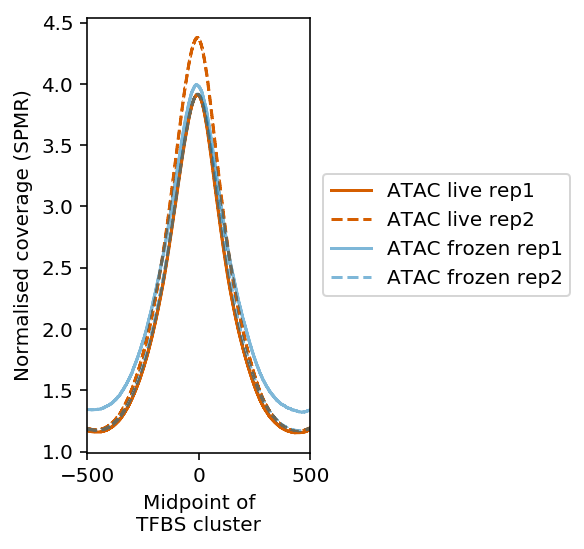

In [11]:
fig = plt.figure(figsize=(2,4))

gdf_.t['atac_wt_emb_rep1'].plot(label='ATAC live rep1', color=yp.RED)
gdf_.t['atac_wt_emb_rep2'].plot(label='ATAC live rep2', color=yp.RED, linestyle='dashed')
gdf_.t['HS322_EMB_JA33_atac_S1'].plot(label='ATAC frozen rep1', color=yp.BLUE, alpha=0.7)
gdf_.t['HS333_JA26_atac_S2'].plot(label='ATAC frozen rep2', color=yp.BLUE, alpha=0.7, linestyle='dashed')

plt.gca().set_xlabel('Midpoint of\nTFBS cluster')
plt.gca().set_ylabel('Normalised coverage (SPMR)')
plt.gca().set_xlim([-500, 500])
plt.gca().legend(loc='center right', borderaxespad=-13)
fp_ = 'annot_Apr27/Fig1S1D_live_vs_frozen.pdf'
plt.savefig(fp_, dpi=600, transparent=True, bbox_inches='tight')